# HMS Capstone - Data Cleaning

In [51]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## STEP #1: Read in dataset from .csv

In [52]:
# read in dataset as DataFrame
HMS = pd.read_csv('2016-2017.csv')

In [53]:
# replace Excel NULL's with Python NaN's
HMS = HMS.replace(['#NULL!'], [np.NaN])

## STEP #2: Conduct high-level diagnostics

In [54]:
HMS.head() # all good here
HMS.tail() # identified missing values

,survey,schoolnum,nrweight,responseid,age,sex_birth,gender,gender_text,sexual,sexual_text,...,talk2pro,talk2adv,talk2ofa,talk2ta,talk2sta,talk2dea,talk2oth,talk2noo,viol_victim,ret_confid_y
53755,NaN,NaN,1.43,R_1dnNevp7EG1R8Ht,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,NaN,NaN
53756,NaN,NaN,1.13,R_30uhu9O9lvYtFG5,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,NaN,NaN
53757,NaN,NaN,1.73,R_20O11J6JJ29G3G1,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,NaN,NaN
53758,NaN,NaN,0.24,R_3j0Qwrmw8gELHgm,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,NaN,NaN
53759,NaN,NaN,1.13,R_zeFliYhCqHgUBi1,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,NaN,NaN


In [55]:
HMS.survey.value_counts(dropna = False) # 1142 missing values

HMS Winter 2017         34795
HMS Fall 2016           12515
HMS Winter 2017 CCMH     5308
NaN                      1142
Name: survey, dtype: int64

In [56]:
HMS.shape # 53760 students x 1581 variables

(53760, 1581)

In [57]:
HMS.info(null_counts = True) # identified dtype issues

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53760 entries, 0 to 53759
Columns: 1581 entries, survey to ret_confid_y
dtypes: float64(7), int64(88), object(1486)
memory usage: 648.5+ MB


In [58]:
HMS.describe(include = 'all') # investigated dtype issues

,survey,schoolnum,nrweight,responseid,age,sex_birth,gender,gender_text,sexual,sexual_text,...,talk2pro,talk2adv,talk2ofa,talk2ta,talk2sta,talk2dea,talk2oth,talk2noo,viol_victim,ret_confid_y
count,52618,52618.0,53760.000000,53760,52618.0,52548,52536,314,52345,1691,...,53760.000000,53760.000000,53760.000000,53760.000000,53760.000000,53760.000000,53760.000000,53760.000000,47828,50826
unique,3,55.0,NaN,53760,85.0,6,12,208,12,438,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,HMS Winter 2017,49.0,NaN,R_CayJ2kVp6Mr9PBD,21.0,1,2,Agender,1,Pansexual,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
freq,34795,4705.0,NaN,1,7473.0,18123,20099,20,39932,324,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44951,42367
mean,NaN,NaN,1.028820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.302269,0.280004,0.060789,0.020182,0.117839,0.040513,0.315644,0.058557,NaN,NaN
std,NaN,NaN,0.944637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.459246,0.449005,0.238945,0.140625,0.322420,0.197162,0.464776,0.234795,NaN,NaN
min,NaN,NaN,0.080000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,0.480000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,0.820000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,1.270000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,NaN,NaN


## STEP #3: Clean data

### 1) check for duplicate rows

In [59]:
print('no duplicate rows!') if not any(HMS.duplicated()) else 'duplicates present!'

no duplicate rows!


### 2) address missing values

In [60]:
# remove students who didn't complete the survey
HMS = HMS[pd.notnull(HMS['survey'])]

### 3) convert datatypes

In [61]:
# BEFORE: nearly all 'object' datatypes
HMS.dtypes.value_counts()

object     1486
int64        88
float64       7
dtype: int64

In [62]:
# DURING: convert all *non-string* columns to a 'numeric' datatype
HMS = HMS.apply(pd.to_numeric, errors = 'ignore')

In [63]:
# AFTER: nearly all 'float64' datatypes
HMS.dtypes.value_counts()

float64    1434
int64        89
object       58
dtype: int64

## STEP #4: Check for outliers

### survey type

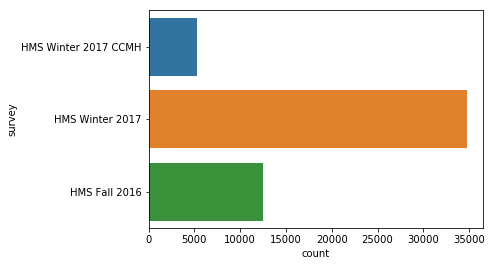

In [64]:
sns.countplot(y = 'survey', data= HMS) # seems normal

### schoolnum respondents

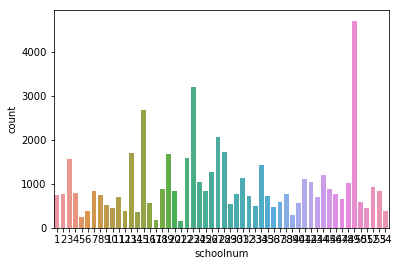

In [65]:
sns.countplot(x = 'schoolnum', data = HMS) # interesting distribution

### age

In [66]:
# remove decimal or 0-value ages
for idx, age in enumerate(HMS.age):
    if (not age.is_integer()) or (age == 0):
        HMS.age = HMS.age.drop([idx])
        print('removed:',age)

('removed:', 18.100000000000001)
('removed:', 0.0)
('removed:', 19.5)
('removed:', 21.5)


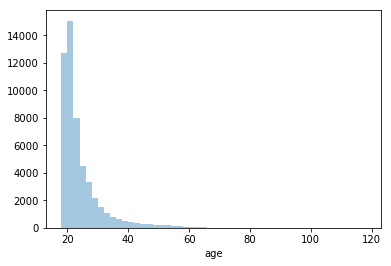

In [67]:
# plot histograpm of age distribution
ageForPlot = pd.to_numeric(HMS.age).dropna()
sns.distplot(ageForPlot, kde = False)

In [68]:
# check oldest reported ages
ageForPlot.nlargest(n=8)

16317    118.0
3242      99.0
12805     83.0
40130     82.0
40446     80.0
24674     75.0
34664     73.0
8462      72.0
Name: age, dtype: float64

In [69]:
# check percentage of older age groups
print('percent over 25 years old:', len(HMS[HMS['age'] > 25])/len(HMS.age))
print('percent over 30 years old:', len(HMS[HMS['age'] > 30])/len(HMS.age))
print('percent over 35 years old:', len(HMS[HMS['age'] > 35])/len(HMS.age))

('percent over 25 years old:', 0.23503363867877913)
('percent over 30 years old:', 0.11496065985024136)
('percent over 35 years old:', 0.06663119084723859)


### NOTE: I decided to remove respondents over 30 years old (as outliers)

In [70]:
# remove participants over 30 years old
HMS = HMS[HMS['age'] < 30]

### sex_birth

[<matplotlib.text.Text at 0x120689790>, <matplotlib.text.Text at 0x135a6ca90>]

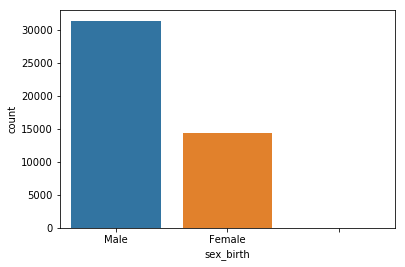

In [71]:
ax = sns.countplot(x = 'sex_birth', data = HMS)
ax.set_xticklabels(['Male', 'Female'])

### sexuality

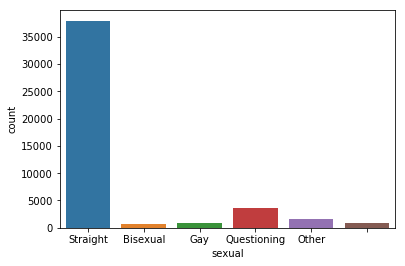

In [72]:
ax = sns.countplot(x = 'sexual', data = HMS)
ax.set_xticklabels(['Straight', 'Bisexual', 'Gay', 'Questioning', 'Other'])

## STEP #5: Organize data 

### 1) Extract required columns

In [73]:
# separate out standard survey modules
HMS_ids = HMS.loc[:, 'schoolnum':'responseid']
HMS_demo = HMS.loc[:, 'age':'disab_3']
HMS_mhstatus = HMS.loc[:, 'diener1':'sleep_np2']
HMS_mhhelp = HMS.loc[:, 'dx_dep1':'pay_mh']

# get AAQ scores, sum them, & convert 0's to NaN
HMS_aaq = HMS.loc[:, 'AAQ_1':'AAQ_7']
HMS_aaq['AAQ_total'] = HMS_aaq.sum(axis=1)
HMS_aaq.AAQ_total[HMS_aaq.AAQ_total == 0.0] = np.NaN

In [74]:
HMS_ids.head(3)
print('total IDs:',len(HMS_ids.dropna(axis=0, how='all')))

('total IDs:', 45756)


In [75]:
HMS_demo.head(3)
print('total demographics:',len(HMS_demo.dropna(axis=0, how='all')))

('total demographics:', 45756)


In [76]:
HMS_mhstatus.head(3)
print('total MH status:',len(HMS_mhstatus.dropna(axis=0, how='all')))

('total MH status:', 43441)


In [77]:
print('total MH help:',len(HMS_mhhelp.dropna(axis=0, how='all')))

('total MH help:', 41188)


In [78]:
HMS_aaq.head(3)
print('total AAQ scores:',len(HMS_aaq.dropna(axis=0, how='any')))

('total AAQ scores:', 24725)


## STEP #6: Convert data from wide to tall

### 1) Write tidy data function

In [79]:
def tidyCatVarGroup(varGroup, categoryName, uniqueID, numMetrics):
    
    # 1) convert categorical variables into dummy/indicator variables
    dummies = pd.get_dummies(varGroup)
    dummies.columns = varGroup.columns
    
    # 2) add unique ID + numerical metrics
    dummies.insert(0, uniqueID.name, uniqueID)
    data = dummies.join(numMetrics.apply(pd.to_numeric))
    
    # 3) melt data from wide to tall
    melted_data = pd.melt(data, id_vars = list(numMetrics.columns.insert(0, uniqueID.name)), var_name = categoryName)
    
    # 4) Filter out all the 0 values (aka: this person doesn't identity with this race) and drop column
    tidy_data = melted_data.loc[melted_data.loc[:,'value'] == 1]
    tidy_data = tidy_data.drop('value', axis = 1)
    
    return tidy_data

### 2) Gather ID's, KPI's, & variable groups

In [80]:
# gather uniqueIDs
HMS_IDs = HMS_ids['responseid']

In [81]:
# gather mental health key-performance-indicators (KPIs)
HMS_KPIs = pd.concat([HMS_mhstatus['flourish'], HMS_mhstatus['deprawsc'],
                      HMS_mhstatus['anx_score'], HMS_aaq['AAQ_total']], axis=1)

In [82]:
# gather main variable groups
HMS_race = HMS.loc[:, 'race_black':'race_other']
HMS_religion = HMS.loc[:, 'relig_aff_ag':'relig_aff_oth']
HMS_degreeType = HMS.loc[:, 'degree_ass':'degree_nd']
HMS_fieldOfStudy = HMS.loc[:, 'field_hum':'field_other']
HMS_activity = HMS.loc[:, 'activ_ac':'activ_none']

### 3) Tidy data (wide to tall)

In [83]:
# tidy variable groups
tidy_race = tidyCatVarGroup(HMS_race, 'race', HMS_IDs, HMS_KPIs)
tidy_religion = tidyCatVarGroup(HMS_religion, 'religion', HMS_IDs, HMS_KPIs)
tidy_degreeType = tidyCatVarGroup(HMS_degreeType, 'degreeType', HMS_IDs, HMS_KPIs)
tidy_fieldOfStudy = tidyCatVarGroup(HMS_fieldOfStudy, 'fieldOfStudy', HMS_IDs, HMS_KPIs)
tidy_activity = tidyCatVarGroup(HMS_activity, 'activity', HMS_IDs, HMS_KPIs)

# gather other variables too
tidy_age = pd.DataFrame(HMS_IDs).join(HMS_KPIs.apply(pd.to_numeric)).join(HMS.age)
tidy_gender = pd.DataFrame(HMS_IDs).join(HMS_KPIs.apply(pd.to_numeric)).join(HMS.gender)
tidy_relig = pd.DataFrame(HMS_IDs).join(HMS_KPIs.apply(pd.to_numeric)).join(HMS.religios)

In [84]:
# preview tidy data
tidy_race.head()

,responseid,flourish,deprawsc,anx_score,AAQ_total,race
16,R_1gvZNcJatOt9lEi,49.0,NaN,NaN,NaN,race_black
34,R_1JOq1q31fzyKpXu,45.0,NaN,NaN,NaN,race_black
40,R_2xwWffFvNbw4BOp,NaN,NaN,NaN,NaN,race_black
49,R_27kz8oG4lLC41TA,43.0,NaN,NaN,NaN,race_black
73,R_1NC8EpaqcDX0CLm,52.0,NaN,NaN,NaN,race_black


## STEP #7: Pass variables to next Jupyter notebook

In [85]:
# cleaned dataset
%store HMS

# separated modules
%store HMS_ids
%store HMS_demo
%store HMS_mhstatus
%store HMS_mhhelp
%store HMS_aaq

# tidy variable groups
%store tidy_race
%store tidy_religion
%store tidy_degreeType
%store tidy_fieldOfStudy
%store tidy_activity
%store tidy_age
%store tidy_gender
%store tidy_relig

Stored 'HMS' (DataFrame)
Stored 'HMS_ids' (DataFrame)
Stored 'HMS_demo' (DataFrame)
Stored 'HMS_mhstatus' (DataFrame)
Stored 'HMS_mhhelp' (DataFrame)
Stored 'HMS_aaq' (DataFrame)
Stored 'tidy_race' (DataFrame)
Stored 'tidy_religion' (DataFrame)
Stored 'tidy_degreeType' (DataFrame)
Stored 'tidy_fieldOfStudy' (DataFrame)
Stored 'tidy_activity' (DataFrame)
Stored 'tidy_age' (DataFrame)
Stored 'tidy_gender' (DataFrame)
Stored 'tidy_relig' (DataFrame)
